### Fill in your name, student id number and email address
#### name: Eunhee Kim
#### id number: 612875
#### email: eunee.stella@gmail.com / eunhee.e.kim@utu.fi

## Data analysis and knowledge discovery - Exercise 4: Unsupervised learning

This is the template for the fourth exercise. The idea of this exercise is to familiarize yourself with the basics of unsupervised learning by using the K-means clustering algorithm to find patterns - in this case clusters of ships with the same type - in the data. The same dataset will be used in this exercise as in the previous two exercises.

 - Remember to include comments in your code to explain how it works and what it is supposed to do.

 - For answering the optional bonus task correctly, you will be awarded one bonus point.

 - If you are having problems with this exercise, try google or stackoverflow first. Then, if the problem still persists, please contact ilksuu@utu.fi for help.

### Import all the libraries etc. you need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Read the data

Read the file containing the ship data into a pandas dataframe.

In [2]:
shipdata = pd.read_excel('shipdata_2019.xlsx')

### Part 1: Preprocess and visualize the data

 - You should know already that there exists an incorrect value in the 'Length (m)' column of the dataframe. Correct the value before any further preprocessing. You can find the correct value in marinetraffic.com by searching with the MMSI-number of the ship.

 - Use 'Speed (knots)', 'COG (degrees)' and 'Length (m)' as features for this exercise. You will also need the 'Ship type' -column later to be used as labels. Gather the features and labels in two arrays (e.g. X and Y).
 
 - Perform z-score standardization on the feature array to ensure that all features have equal weight.
 
 - Map the data to two dimensions by using principal component analysis and visualize the resulting two-dimensional data as a scatter plot. How many clusters of data points can you see in the scatter plot? Try to base your answer on the appearance of the scatter plot and not on your prior knowledge of the data.

#### Correct the value before any further preprocessing

In [3]:
shipdata['Length'].describe()

count     135.000000
mean      134.629852
std        95.137091
min        15.000000
25%        88.960000
50%       116.260000
75%       160.530000
max      1000.000000
Name: Length, dtype: float64

(array([64., 55., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  15. ,  113.5,  212. ,  310.5,  409. ,  507.5,  606. ,  704.5,
         803. ,  901.5, 1000. ]),
 <a list of 10 Patch objects>)

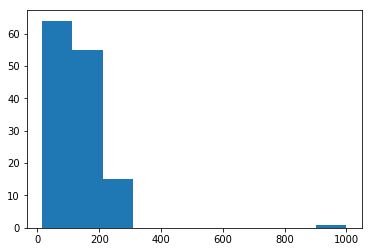

In [4]:
plt.hist(shipdata['Length'])

The maximun ```Length``` is 1000(m)

In [5]:
shipdata[shipdata['Length']==1000]

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
62,255714000,13.2697,60.3354,Porvoo,Tanker,3785,1000.0,17.0


It has different value when checked marinetraffic.com. Then let's change the value.

In [6]:
shipdata['Length'].iloc[62] = 100

C:\Users\eunee\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### Use 'Speed (knots)', 'COG (degrees)' and 'Length (m)' as features for this exercise

In [7]:
X = shipdata[['Speed', 'COG', 'Length']]

#### You will also need the 'Ship type' -column later to be used as labels. Gather the features and labels in two arrays (e.g. X and Y).

In [8]:
Y = shipdata['Ship_type']

#### Perform z-score standardization on the feature array to ensure that all features have equal weight.

In [9]:
scaler = preprocessing.StandardScaler().fit(X.iloc[:,0:])

In [10]:
X_transformed = scaler.transform(X.iloc[:,0:])

#### Map the data to two dimensions by using principal component analysis and visualize the resulting two-dimensional data as a scatter plot.

In [11]:
pca = PCA(n_components = 2).fit(X.iloc[:,0:])
pca_norm = PCA(n_components = 2).fit(X_transformed)
X_pca = pca.transform(X.iloc[:,0:])
X_pca_norm = pca_norm.transform(X_transformed)

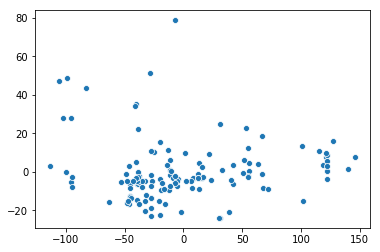

In [12]:
sns.scatterplot(X_pca[:,0], X_pca[:,1])

#### How many clusters of data points can you see in the scatter plot?

I can see three clusters. One on the left, one on the middle-top and one on the middle-bottom

### Part 2: Perform clustering on the data and evaluate the results using silhouette score

 - Perform K-means clustering on the data using different values of K (for example ranging from 2 to 6). Use the original z-score standardized 3-dimensional data - **that is, not the pca-transformed two-dimensional data** - for the clustering. Compute the silhouette score for each clustering.
 - Is the number of clusters with the highest silhouette score the same that you chose based on the visual inspection of the scatter plot in part 1?

#### Perform K-means clustering on the data using different values of K (for example ranging from 2 to 6). Use the original z-score standardized 3-dimensional data

In [13]:
for i in range(5) :
    kmeans = KMeans(n_clusters = i+2).fit(X_transformed)
    print('Clustering labels when k is ', i+2)
    print(kmeans.labels_)
    print('')

Clustering labels when k is  2
[0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0
 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1]

Clustering labels when k is  3
[1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 2 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1
 2 1 1 1 1 0 1 1 2 2 1 2 2 1 1 1 2 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0
 1 0 0 1 0 1 1 1 1 1 2 2 2 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0]

Clustering labels when k is  4
[1 3 1 3 3 3 1 1 1 1 1 1 1 1 1 3 3 2 3 1 1 1 3 3 3 1 3 3 1 3 3 1 3 0 1 3 1
 2 1 1 1 1 0 1 1 2 2 1 2 2 0 1 1 2 3 0 1 3 3 3 1 3 3 3 3 3 0 0 3 3 3 3 0 0
 1 0 0 3 3 1 1 1 1 1 2 2 2 1 1 3 1 1 3 0 0 0 0 0 0 0 1 0 3 0 0 0 3 0 1 3 1
 1 1 1 1 3 3 1 1 1 1 1 1 0 1 0 1 3 3 3 1 1 1 0 0]

Clustering labels when k is  5
[0 3 0 0 0 0 4 0 0 0 4 0 0 0 4 3 0 1 0 4 4 0 0 0

#### Compute the silhouette score for each clustering.

In [14]:
for i in range(5) :
    score = []
    kmeans = KMeans(n_clusters = i+2).fit(X_transformed)
    sil_score = silhouette_score(X_transformed, kmeans.labels_)
    score.append(sil_score)
    print("Silhouette score when k is", i+2, ":", score)

Silhouette score when k is 2 : [0.2965255965641948]
Silhouette score when k is 3 : [0.34625112577381234]
Silhouette score when k is 4 : [0.35065362078808077]
Silhouette score when k is 5 : [0.3062907761145442]
Silhouette score when k is 6 : [0.29743113551294104]


#### Is the number of clusters with the highest silhouette score the same that you chose based on the visual inspection of the scatter plot in part 1?

Highest silhouette score is when k is 4, which is quite different with my visual inspection. But mine, which is k = 3 is also have similar score.

###  Part 3: Compare the clusters with the true labels

 - Choose the K-value that produced the highest silhouette score in part 2. Perform clustering **on the z-score standardized, non-transformed data** using the chosen K-value, then visualize the clusters by using PCA and scatter plot. Color each cluster with a different color.
 - Visualize the data again, this time coloring the scatter plot based on the true class labels. Compare the two scatter plots: how well do the clusters found by the K-means algorithm match the true classes? Place the two scatter plots so that they can easily be compared (e.g. next to each other in the same figure).
 - Based on the visual comparison between the clusters and true classes, would you say that the clustering was successful? Compute the adjusted rand index using the true labels and the labels predicted by K-means algorithm for reference. What does adjusted rand index signify and how do you interpret the result?

#### Choose the K-value that produced the highest silhouette score in part 2.

Choose K-Value 4

#### Perform clustering on the z-score standardized, non-transformed data using the chosen K-value

In [15]:
pca_kmeans = KMeans(n_clusters = 4).fit(X_transformed)
print(silhouette_score(X_transformed, pca_kmeans.labels_))
print('')

kmeans = KMeans(n_clusters = 4).fit(X)
print(silhouette_score(X, kmeans.labels_))

0.35065362078808077

0.5548108475767383


#### Visualize the clusters by using PCA and scatter plot. Color each cluster with a different color.

In [16]:
df = pd.DataFrame()
df['Category'] = pca_kmeans.labels_

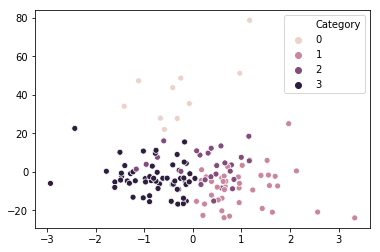

In [17]:
sns.scatterplot(X_transformed[:, 0],X_pca[:, 1], hue = df['Category'])

#### Visualize the data again, this time coloring the scatter plot based on the true class labels. 

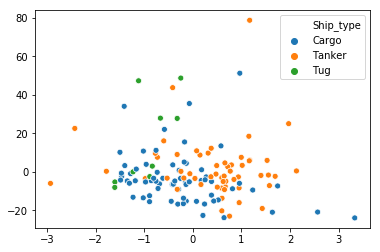

In [18]:
sns.scatterplot(X_transformed[:, 0],X_pca[:, 1], hue = Y)

#### Compare the two scatter plots: how well do the clusters found by the K-means algorithm match the true classes? Place the two scatter plots so that they can easily be compared (e.g. next to each other in the same figure).

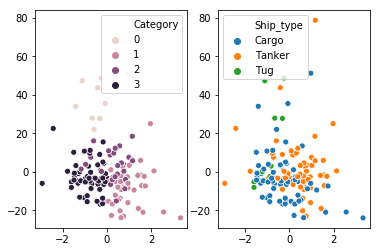

In [19]:
plt.subplot(1,2,1)
sns.scatterplot(X_transformed[:, 0],X_pca[:, 1], hue = df['Category'])

plt.subplot(1,2,2)
sns.scatterplot(X_transformed[:, 0],X_pca[:, 1], hue = Y)

The trend of cluster seems similar, but not 100% perfect.

#### What does adjusted rand index signify and how do you interpret the result?

The number of cluster would be same to use rand index. However given cluster(different ```Ship_type```) is 3, which is different with our best number of cluster 4.

### Part 4: Optional bonus task 

 - Choose a clustering algorithm other than K-means (preferably one for which scikit-learn has an implementation). Write a short description of the algorithm and explain in your own words how the algorithm works. 
 - Perform clustering on the data using the algorithm that you chose. Compute the silhouette score and adjusted rand index. Visualize the clusters and compare them to true classes as in part 3. How do the results compare to K-means?

In [20]:
# write code here, feel free to add more code cells as needed.